__лабораторная работа N1:__  базовые методы машинного обучения, метрический подход

Выполнил Татаренко Александр ИС/м-20-1-о

__цель:__ изучить возможности "классических" методов машинного обучения    
      на примере инструментов библиотеки scikit-learn

__порядок выполнения:__ для каждого типа задачи
1. получить/сгенерировать данные 
2. изучить/визуализировать данные
3. применить к ним соответствующий задаче метод,   
4. к результатам модели применить методы оценки  

In [1]:
import numpy as np

## классификация

### данные

https://archive.ics.uci.edu
    
https://www.openml.org/search?type=data

In [2]:
from sklearn.datasets import make_moons
from sklearn.datasets import make_classification
from sklearn.datasets import make_circles
from sklearn.datasets import make_blobs
from sklearn.datasets import load_iris

In [3]:
from sklearn.model_selection import train_test_split

X,y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.46, random_state=42)

### изучение/визуализация данных

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

dataset = load_iris()
dataframe = pd.DataFrame(dataset['data'],columns=dataset['feature_names'])
dataframe['target'] = dataset['target']

<AxesSubplot:ylabel='Density'>

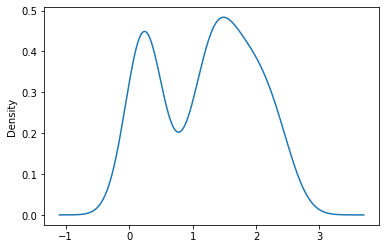

In [5]:
dataframe['petal width (cm)'].plot.kde()

<AxesSubplot:>

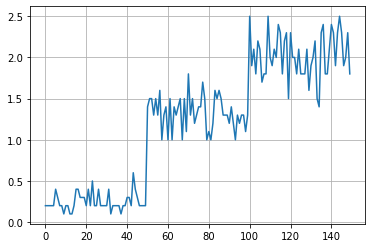

In [6]:
dataframe['petal width (cm)'].plot(grid=True, title = '')

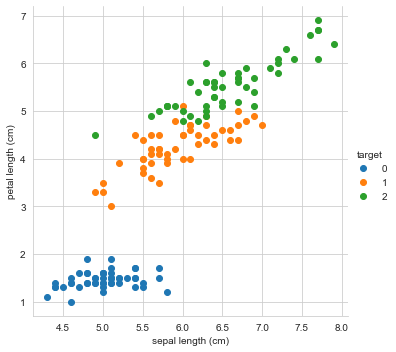

In [9]:
import seaborn as sns

sns.set_style("whitegrid")
sns.FacetGrid(dataframe, hue ="target",height = 5).map(plt.scatter,
                              'sepal length (cm)',
                              'petal length (cm)').add_legend()

### модель

In [10]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train) 
y_pred = model.predict(X_test)

y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0,
       1, 2, 0])

### оценка классификатора

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

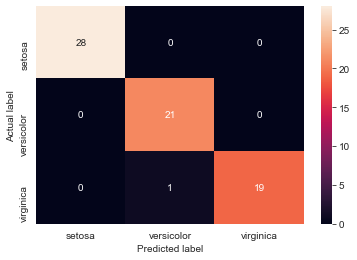

In [13]:
conf_matrix = confusion_matrix(y_test,y_pred)
cm_df = pd.DataFrame(conf_matrix,
                     index = dataset['target_names'], 
                     columns = dataset['target_names'])

sns.heatmap(cm_df, annot=True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       0.95      1.00      0.98        21
           2       1.00      0.95      0.97        20

    accuracy                           0.99        69
   macro avg       0.98      0.98      0.98        69
weighted avg       0.99      0.99      0.99        69



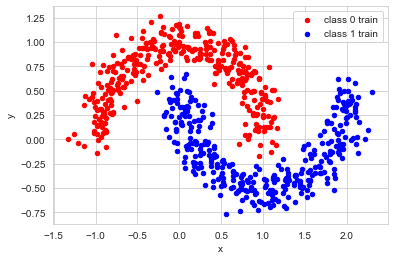

In [16]:
X, y = make_moons(n_samples=1000, noise=0.12)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


dataframe = pd.DataFrame(dict(x=X_train[:,0], y=X_train[:,1], label=y_train))

colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = dataframe.groupby('label')

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=f'class {key} train', color=colors[key])
    
plt.show()

In [17]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_scores = model.predict_proba(X_test)

y_pred

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,

In [18]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
roc_auc = auc(fpr, tpr)

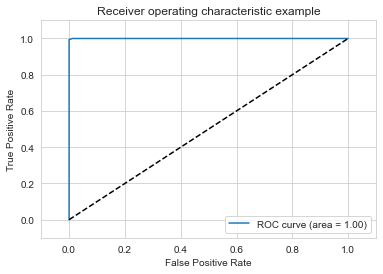

In [19]:
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## регрессия 

### данные

In [20]:
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression

X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf_housing = fetch_california_housing()
dataframe = pd.DataFrame(data = np.c_[clf_housing['data'], clf_housing['target']], columns = np.append(clf_housing['feature_names'],['target']))
dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### модель регресии

https://scikit-learn.org/stable/modules/kernel_ridge.html

In [21]:
from sklearn.kernel_ridge import KernelRidge

model = KernelRidge()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_pred

array([26.70753044, 35.41330589, 17.32532748, 24.37546139, 20.23825491,
       22.07807977, 17.42191546, 16.60512389, 21.80612584, 20.83344291,
       23.05652053, 17.88741977, -8.20433665, 21.32820768, 18.54244814,
       27.06619519, 19.80698004,  5.15292685, 40.28220327, 18.90065818,
       26.77936346, 29.02318858, 12.08935238, 25.94391254, 18.40439309,
       14.0237506 , 21.73600875, 15.04744982, 21.39991885, 19.40142009,
       19.18500451, 25.45126091, 27.37297193, 18.44287988, 15.76100615,
       18.08849717, 31.4127947 , 20.5052596 , 23.26902237, 24.22893406,
       13.78707873, 30.84932668, 42.41366778, 16.7889836 , 26.01591513,
       17.25663379, 14.40732568, 25.71684926, 19.93076334, 29.33073112,
       20.29735618, 32.36770229, 17.26369032, 27.38741421, 38.10336655,
       23.07939336, 20.38864782, 33.19908074, 24.35997133, 12.92665439,
       24.52281722, 32.54109933, 30.11594168, 16.02528422, 23.3875103 ,
       15.01086746, 21.51088739, 25.70208953, 30.95231371, 11.23

### оценка регресии

In [22]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred,y_test)

23.62595789847204

## кластеризация

### данные

In [23]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, centers=10, n_features=3,random_state=0)

### изучение/визуализация данных

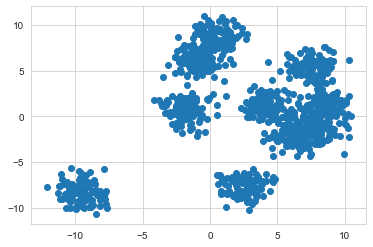

In [24]:
import matplotlib.pyplot as plt
plt.scatter(X[:,1],X[:,0])

### модели кластеризаторов

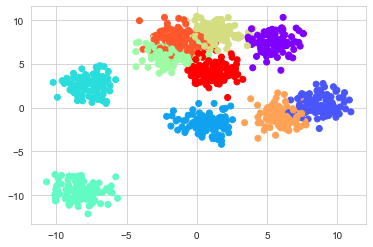

In [25]:
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import DBSCAN

k_means = KMeans(n_clusters=10, random_state=0).fit(X)
km_clusters = k_means.fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=km_clusters,cmap='rainbow')

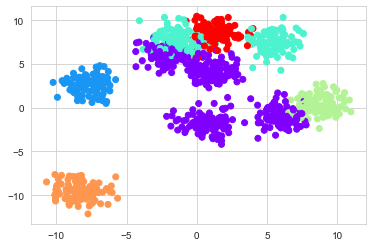

In [26]:
dbscan = DBSCAN(eps=3, min_samples=1).fit(X)
db_clusters = dbscan.fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=db_clusters,cmap='rainbow')

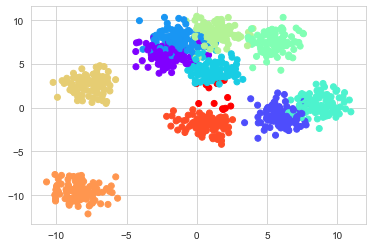

In [27]:
mean_shift = MeanShift(bandwidth=2).fit(X)
ms_clusters = mean_shift.fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=ms_clusters,cmap='rainbow') 

### оценка кластеризации

In [28]:
from sklearn.metrics import silhouette_score

In [29]:
silhouette_score(X,km_clusters)

0.6741123952909466

In [30]:
silhouette_score(X,db_clusters)

0.5542278225954925

In [31]:
silhouette_score(X,ms_clusters)

0.6412411634785214